In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [128]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# describtion

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [129]:
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [130]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [131]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [132]:
df.shape

(8693, 14)

In [133]:
df.size

121702

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [135]:
df.select_dtypes(include=['object']).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [136]:
df.select_dtypes(include=['int', 'float']).columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [137]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


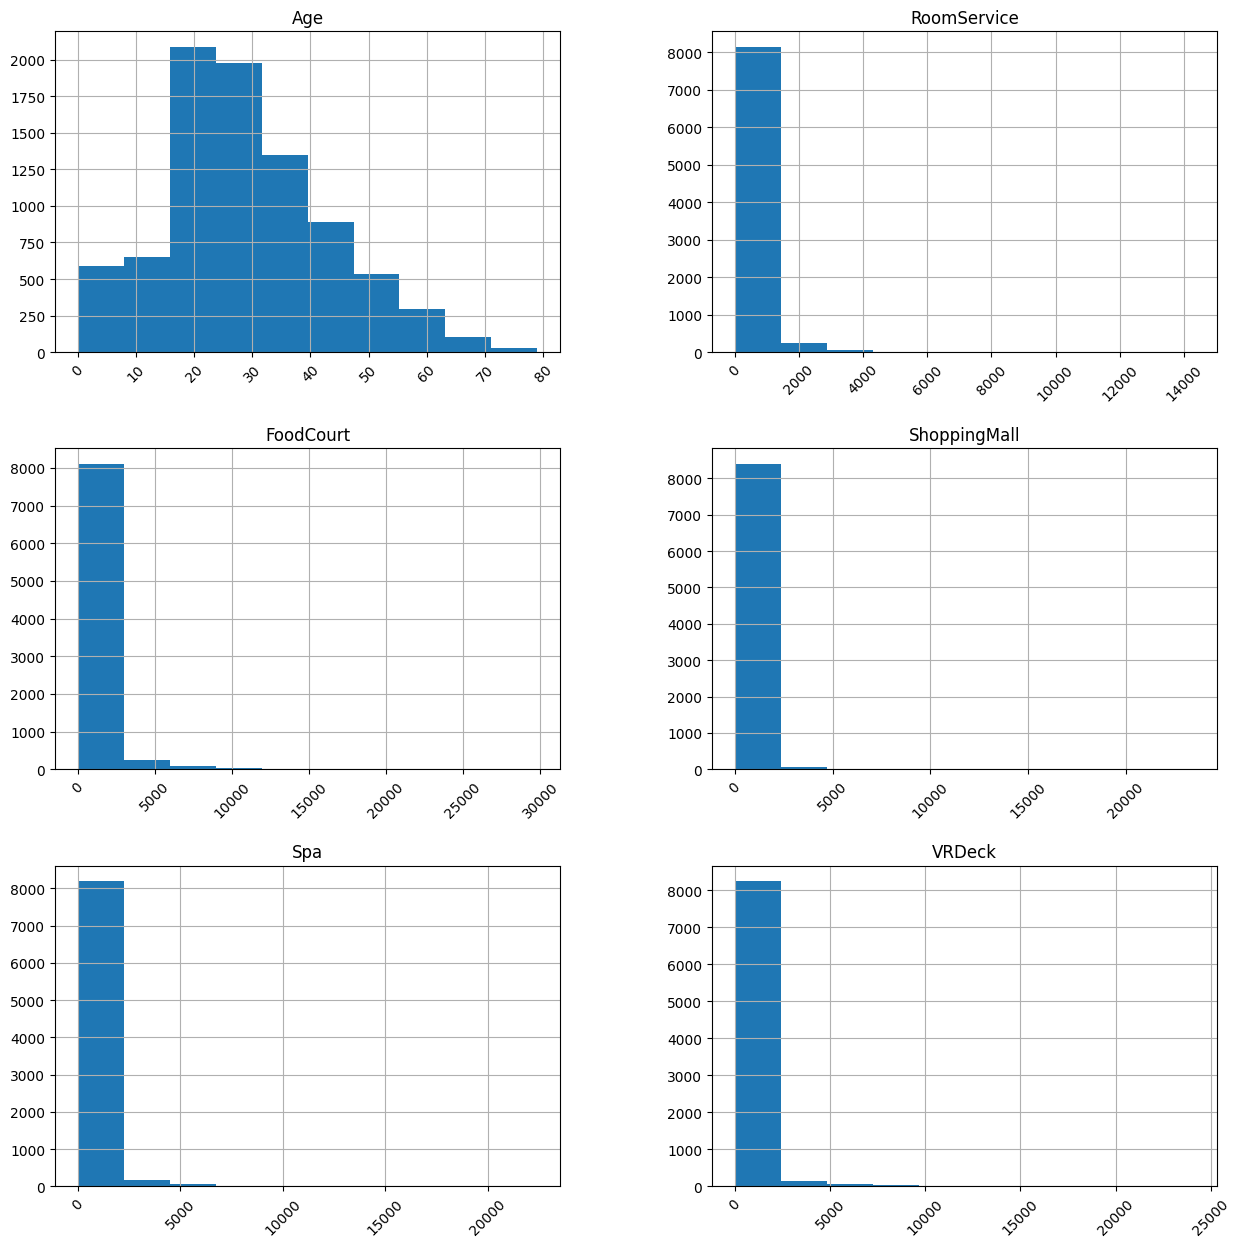

In [138]:
#Destribution of numerical features
df.hist(figsize=(15,15),xrot=45 ,bins=10)
plt.show()

# Data Preprocessing

In [139]:
# Dropping the 'PassengerId' and 'Name' columns
df = df.drop(['PassengerId', 'Name'], axis=1)

In [140]:
#check duplicates
df.duplicated().sum()

15

In [141]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [142]:
#check duplicates
df.duplicated().sum()

0

In [143]:
#check missing values
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           193
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [144]:
# Filling missing values in object columns with mode
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [145]:
# Filling missing values in int or float columns with mean
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

In [146]:
#check missing values
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [147]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

# Checking outliers

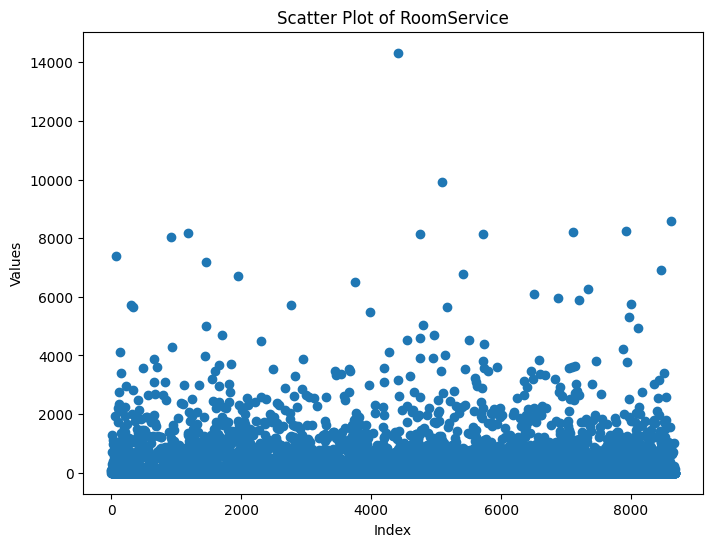

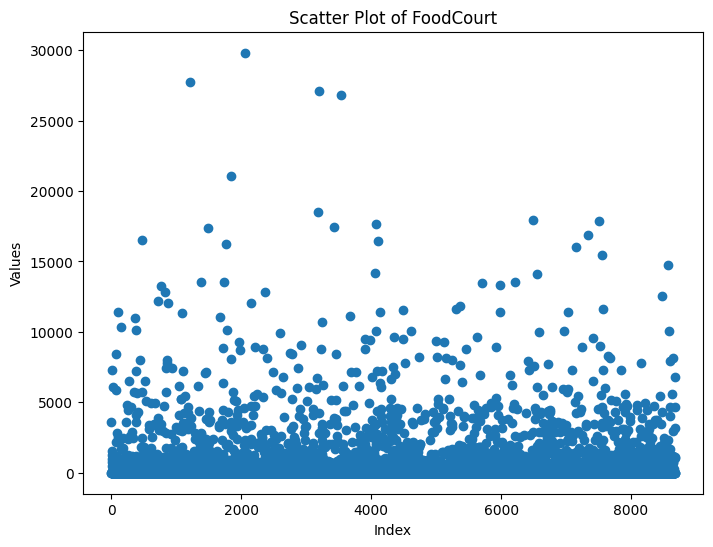

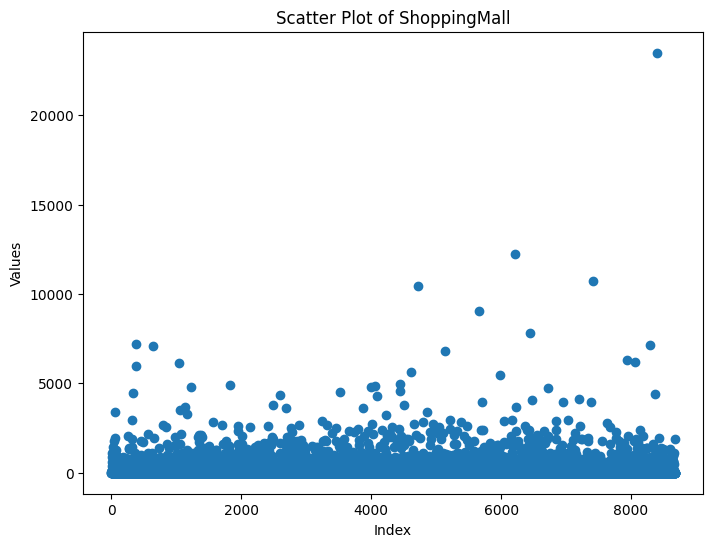

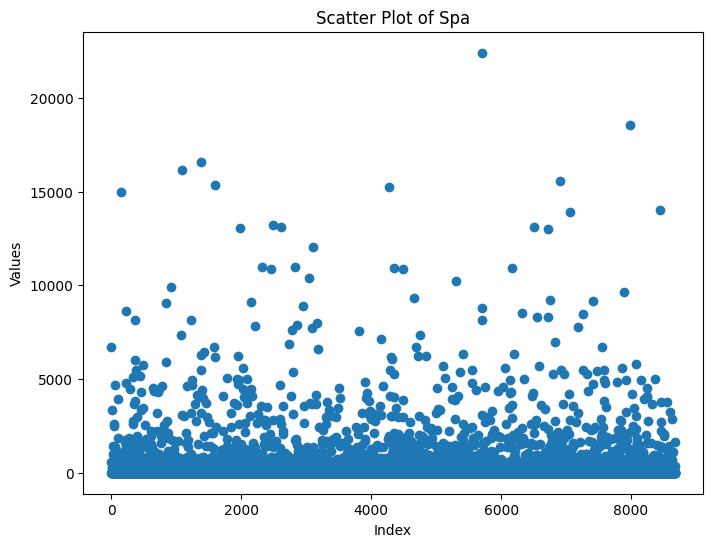

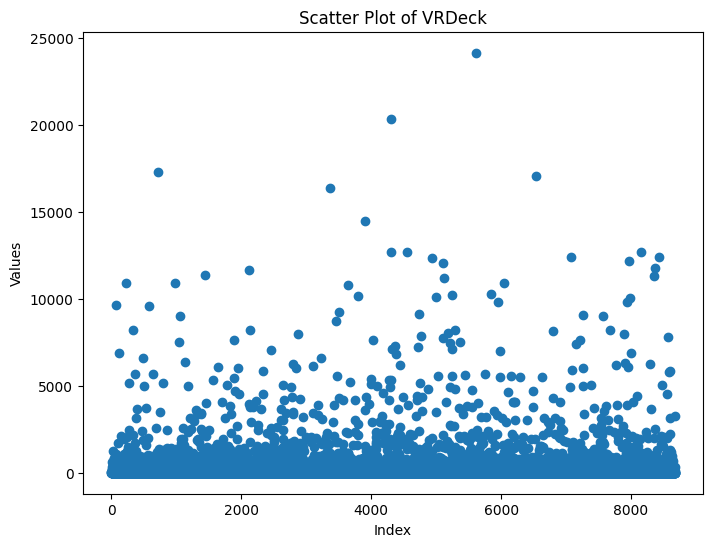

In [148]:
feaures=['Age','RoomService','FoodCourt','ShoppingMall']

# Create a scatter plot for each column
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(df[feature])), df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

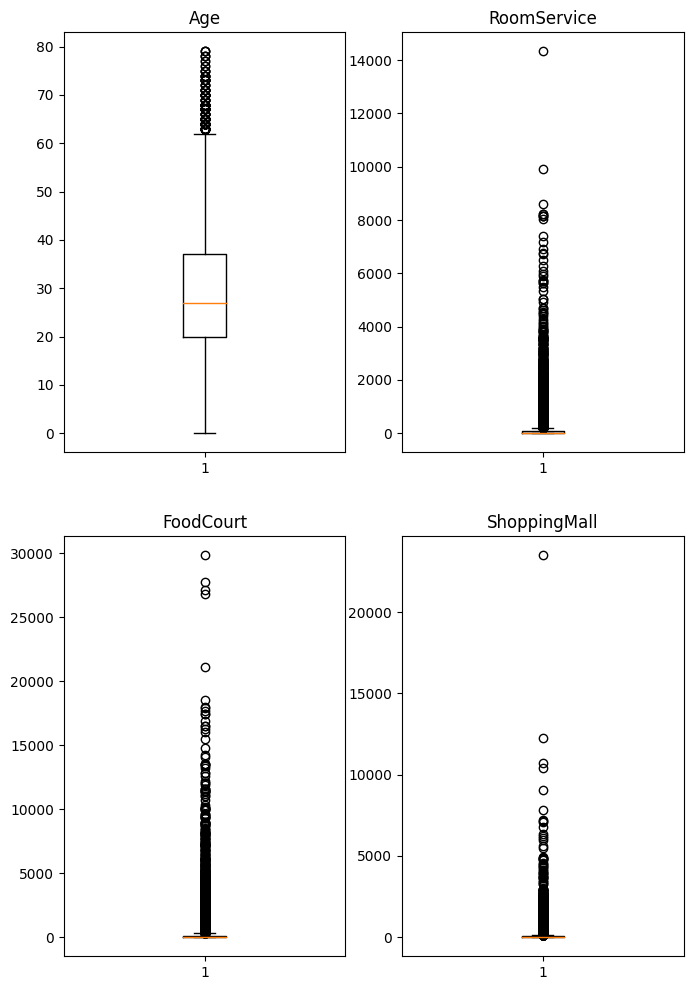

In [149]:

# visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for Age
ax[0, 0].boxplot(x=df[['Age']])
ax[0, 0].set_title('Age')

# Boxplot for RoomService
ax[0, 1].boxplot(x=df[['RoomService']])
ax[0, 1].set_title('RoomService')

# Boxplot for FoodCourt
ax[1, 0].boxplot(x=df[['FoodCourt']])
ax[1, 0].set_title('FoodCourt')

# Boxplot for ShoppingMall
ax[1, 1].boxplot(x=df[['ShoppingMall']])
ax[1, 1].set_title('ShoppingMall')

plt.show()

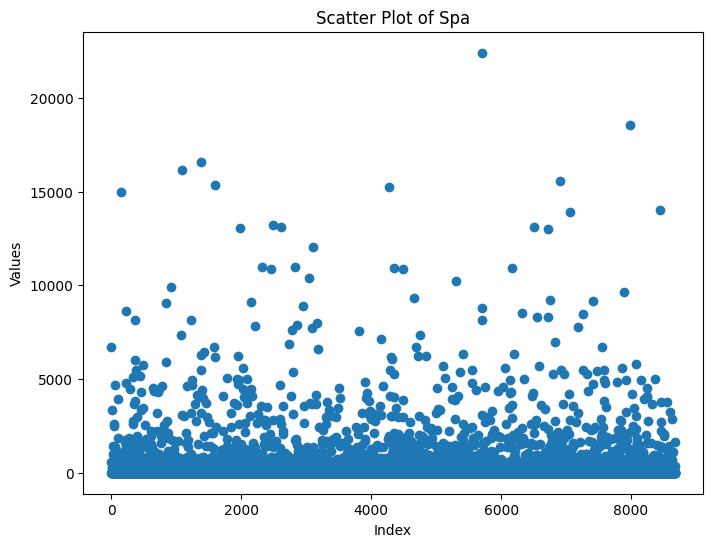

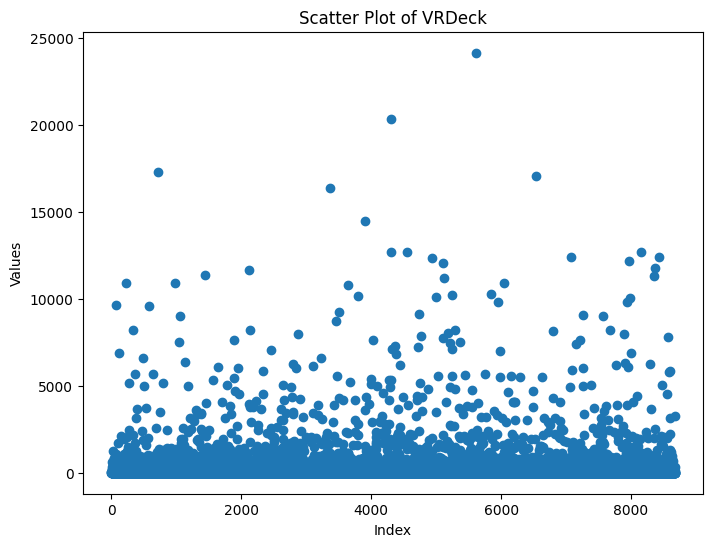

In [150]:
features=['Spa','VRDeck']

# Create a scatter plot for each column
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(df[feature])), df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

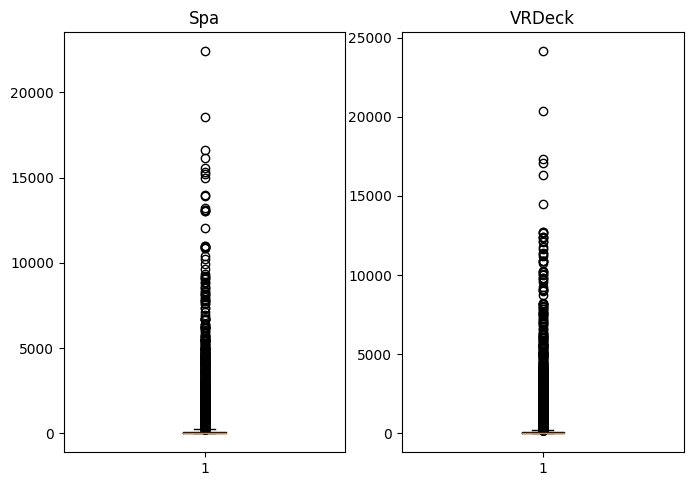

In [151]:
# Visualizing outliers using boxplots
fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for Spa
ax[0, 0].boxplot(x=df[['Spa']])
ax[0, 0].set_title('Spa')

# Boxplot for VRDeck
ax[0, 1].boxplot(x=df[['VRDeck']])
ax[0, 1].set_title('VRDeck')

# Remove the last subplot (ax[1, 0]) from the layout
fig.delaxes(ax[1, 0])

# Remove the last subplot (ax[1, 1]) from the layout
fig.delaxes(ax[1, 1])

plt.show()

In [152]:
"""

features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Initialize dictionaries to store quartile values
Q1 = {}
Q3 = {}
IQR = {}

# Iterate over each column in the features list
for column in features:
    # Q1 and Q3 calculations, and the interquartile range (IQR) for the current column
    Q1[column] = df[column].quantile(0.25)
    Q3[column] = df[column].quantile(0.75)
    IQR[column] = Q3[column] - Q1[column]
    print("Interquartile Range (IQR) for", column, ":", IQR[column])
    
"""

'\n\nfeatures = [\'RoomService\', \'FoodCourt\', \'ShoppingMall\', \'Spa\', \'VRDeck\']\n\n# Initialize dictionaries to store quartile values\nQ1 = {}\nQ3 = {}\nIQR = {}\n\n# Iterate over each column in the features list\nfor column in features:\n    # Q1 and Q3 calculations, and the interquartile range (IQR) for the current column\n    Q1[column] = df[column].quantile(0.25)\n    Q3[column] = df[column].quantile(0.75)\n    IQR[column] = Q3[column] - Q1[column]\n    print("Interquartile Range (IQR) for", column, ":", IQR[column])\n    \n'

In [153]:
"""
for column in features:
    df = df[~((df[column] < (Q1[column] - 1.5 * IQR[column])) | (df[column] > (Q3[column] + 1.5 * IQR[column])))]
"""

'\nfor column in features:\n    df = df[~((df[column] < (Q1[column] - 1.5 * IQR[column])) | (df[column] > (Q3[column] + 1.5 * IQR[column])))]\n'

# Data Visualization

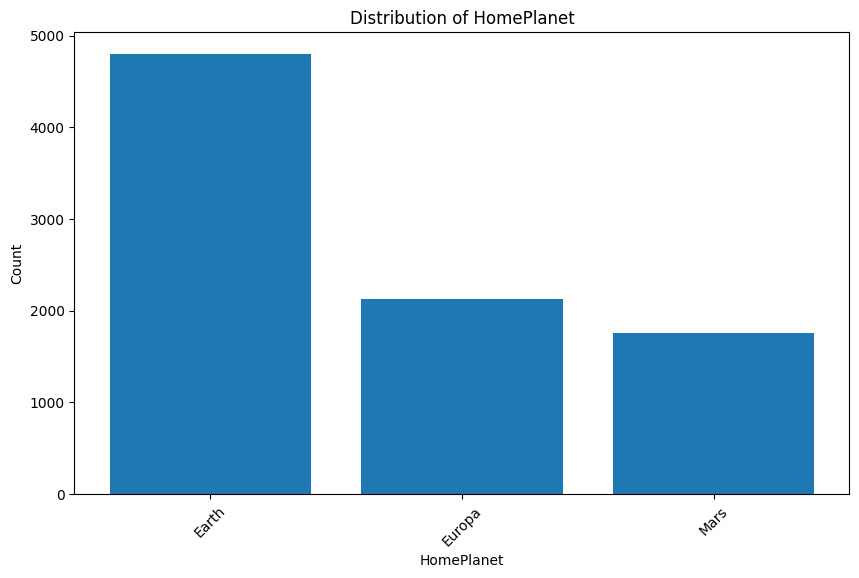

In [157]:
# Visualization of Distribution of HomePlanet
HomePlanet_counts = df['HomePlanet'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(HomePlanet_counts.index, HomePlanet_counts.values)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Distribution of HomePlanet')
plt.xticks(rotation=45) 
plt.show()

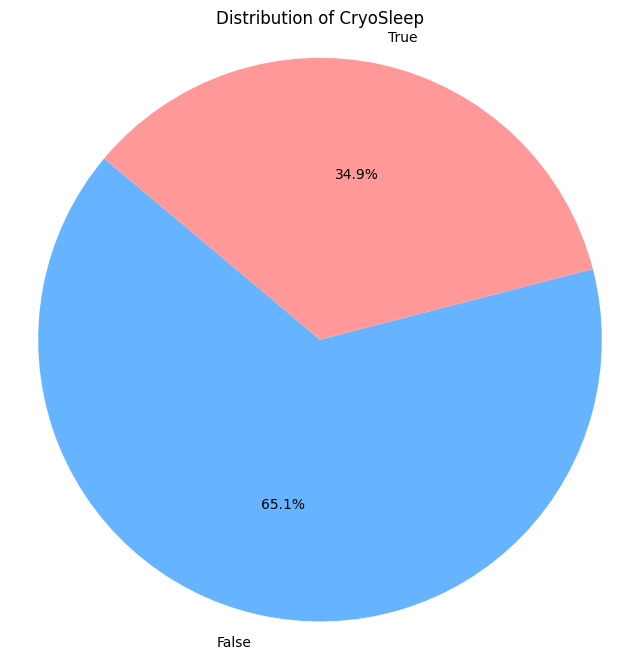

In [158]:
# Define custom colors
colors = ['#66b3ff', '#ff9999']

# Visualization of Distribution of CryoSleep using a pie chart
CryoSleep_counts = df['CryoSleep'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(CryoSleep_counts.values, labels=CryoSleep_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of CryoSleep')
plt.axis('equal') 
plt.show()

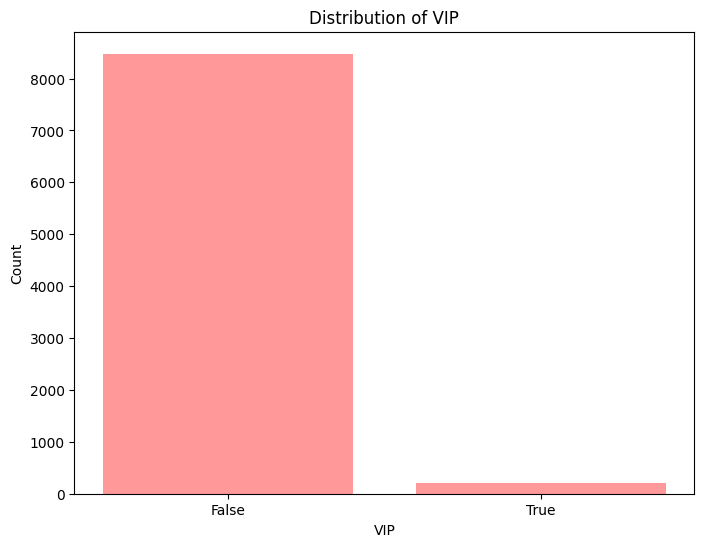

In [159]:
VIP_counts = df['VIP'].value_counts()

# Visualization of Distribution of VIP using a bar graph
plt.figure(figsize=(8, 6))
plt.bar(VIP_counts.index.astype(str), VIP_counts.values, color='#ff9999')  # Convert index to string for labeling
plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Distribution of VIP')
plt.xticks(rotation=0)
plt.show()


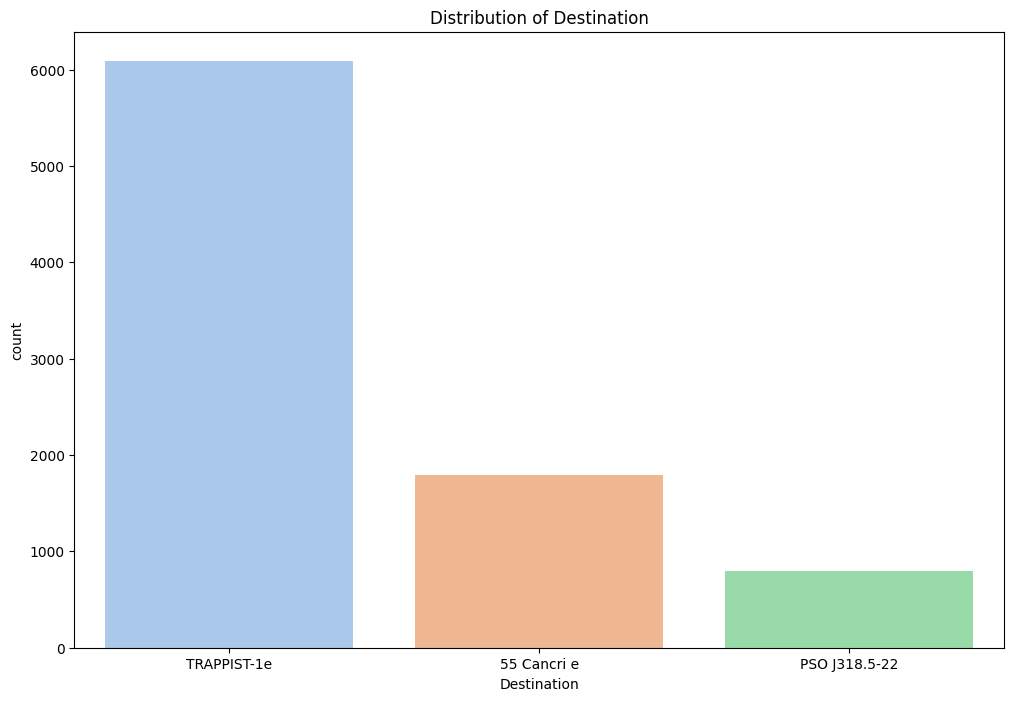

In [160]:
plt.figure(figsize=(12, 8))

# Use countplot for Distribution of Destination
sns.countplot(x='Destination', data=df, palette="pastel", order=df['Destination'].value_counts().index)

plt.title('Distribution of Destination')
plt.show()

In [161]:
df['Transported'].value_counts()

Transported
True     4363
False    4315
Name: count, dtype: int64

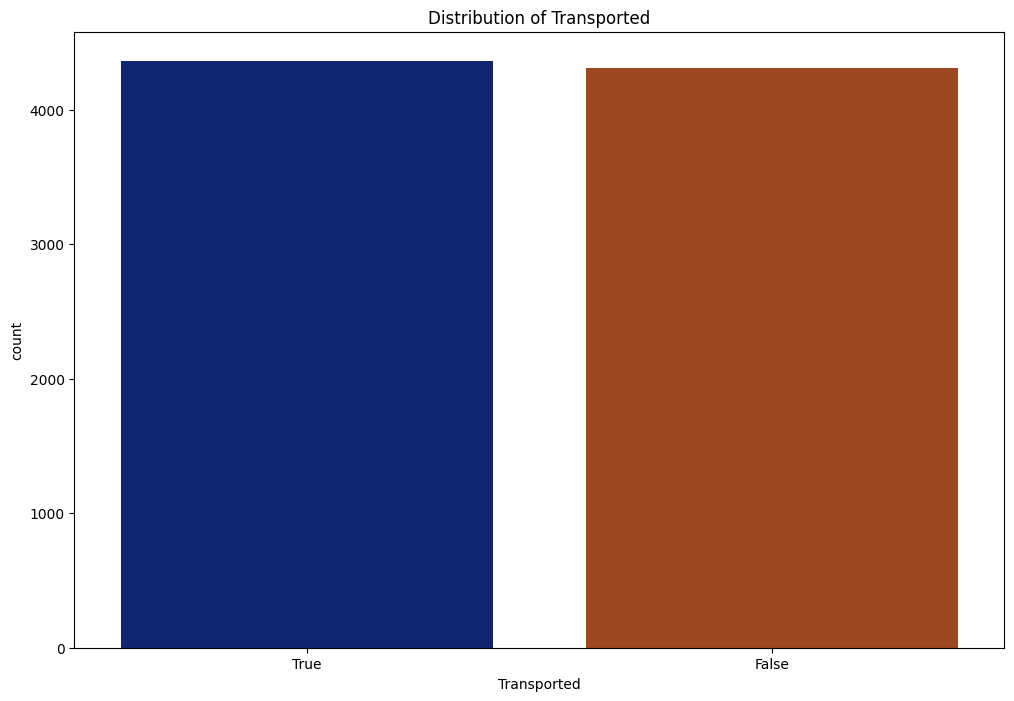

In [162]:
plt.figure(figsize=(12, 8))

# Use countplot for Distribution of Transported
sns.countplot(x='Transported', data=df, palette="dark", order=df['Transported'].value_counts().index)

plt.title('Distribution of Transported')
plt.show()

# Grouping

In [163]:
# Here we mapping age for making the visualization more clear 
age_bins = [0, 18, 35, 50, 100]  
age_labels = ['0-18', '19-35', '36-50', '51+']

df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

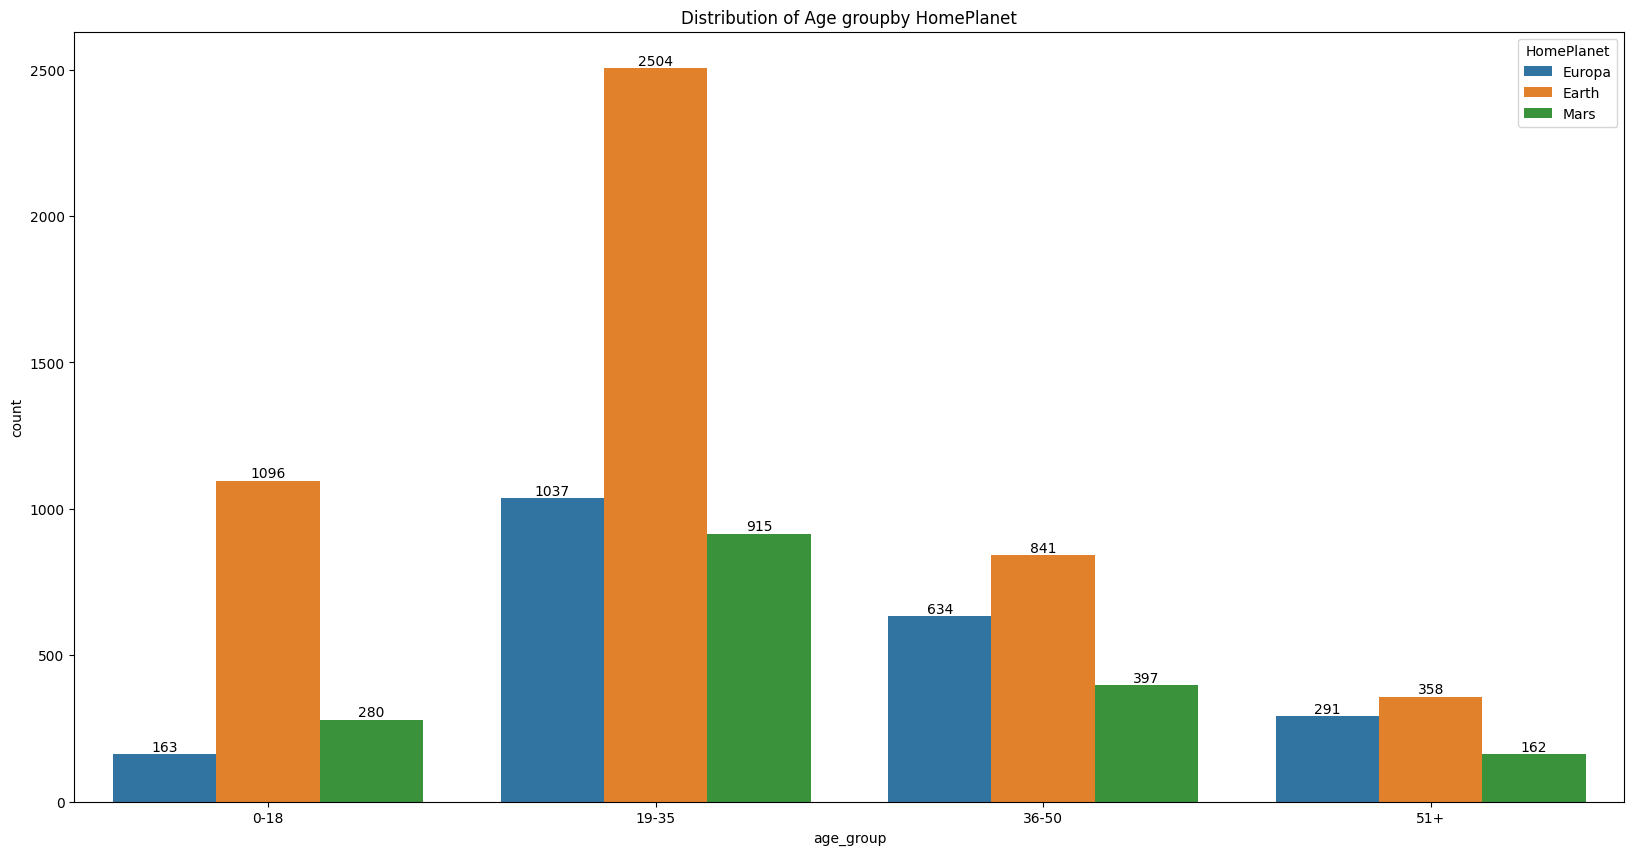

In [164]:
#Distribution of age groupby HomePlanet
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'age_group', hue = 'HomePlanet')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age groupby HomePlanet')
plt.show()

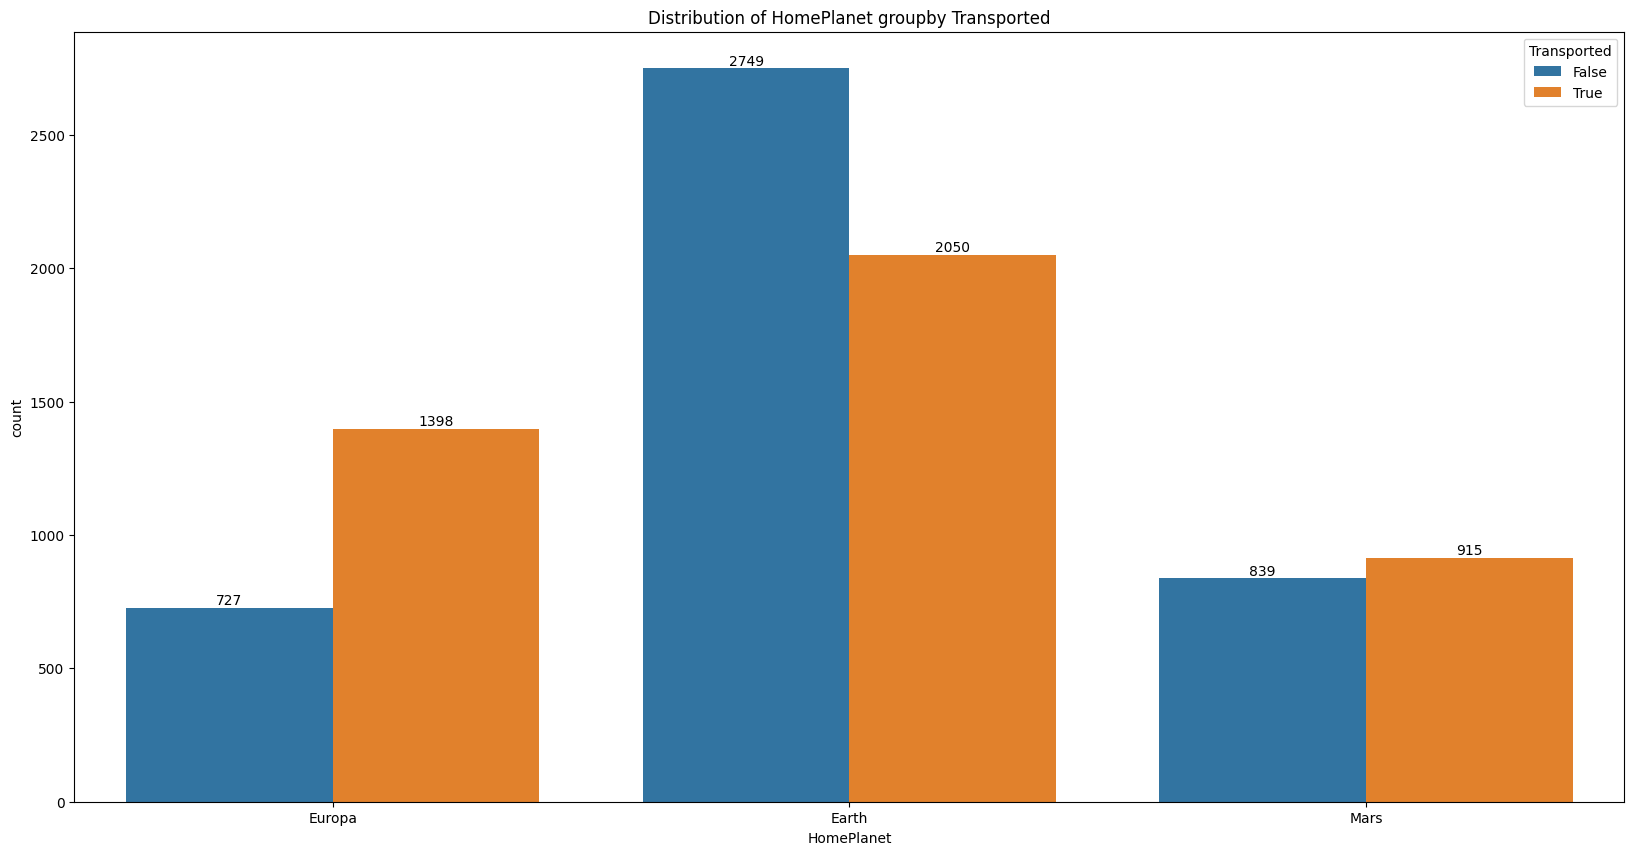

In [165]:
#Distribution of HomePlanet groupby Transported
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'HomePlanet', hue = 'Transported')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of HomePlanet groupby Transported')
plt.show()

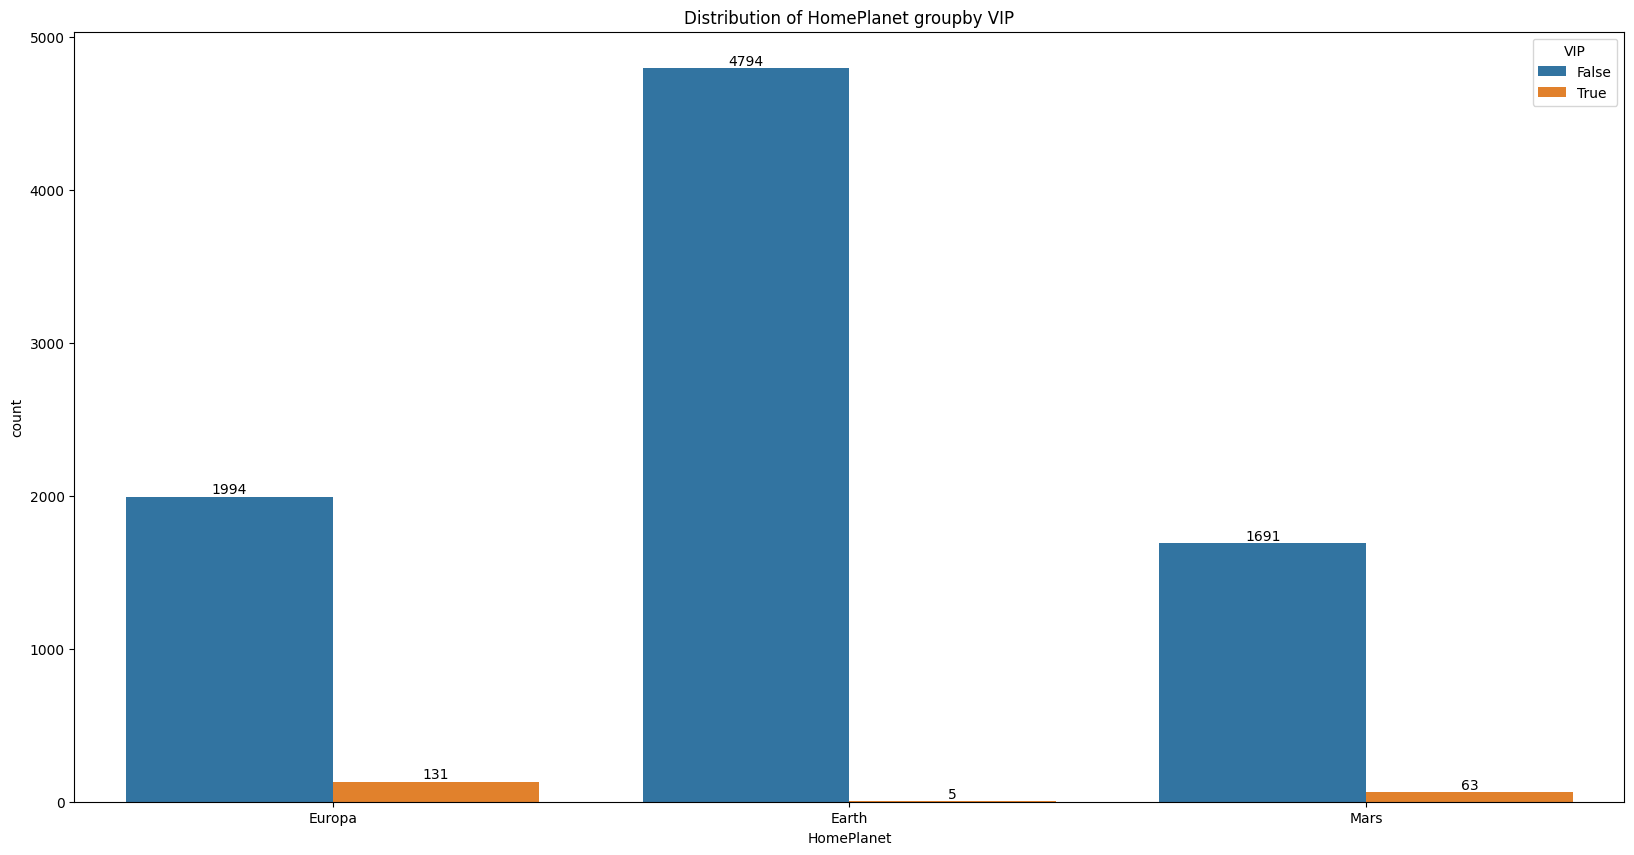

In [166]:
#Distribution of HomePlanet groupby VIP
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'HomePlanet', hue = 'VIP')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of HomePlanet groupby VIP')
plt.show()

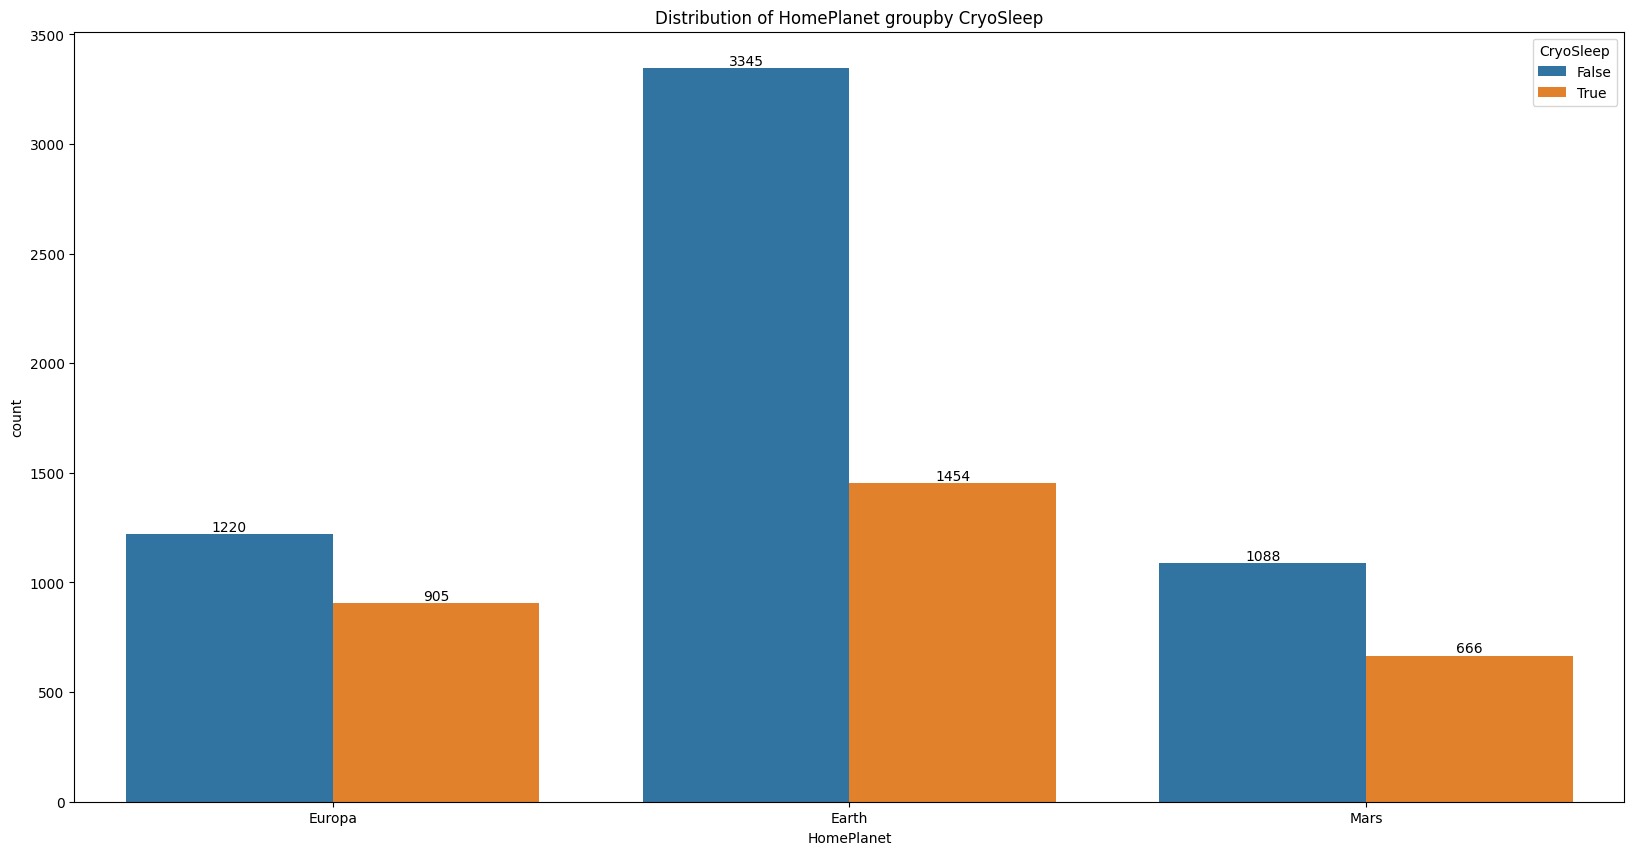

In [167]:
#Distribution of HomePlanet groupby CryoSleep
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'HomePlanet', hue = 'CryoSleep')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of HomePlanet groupby CryoSleep')
plt.show()

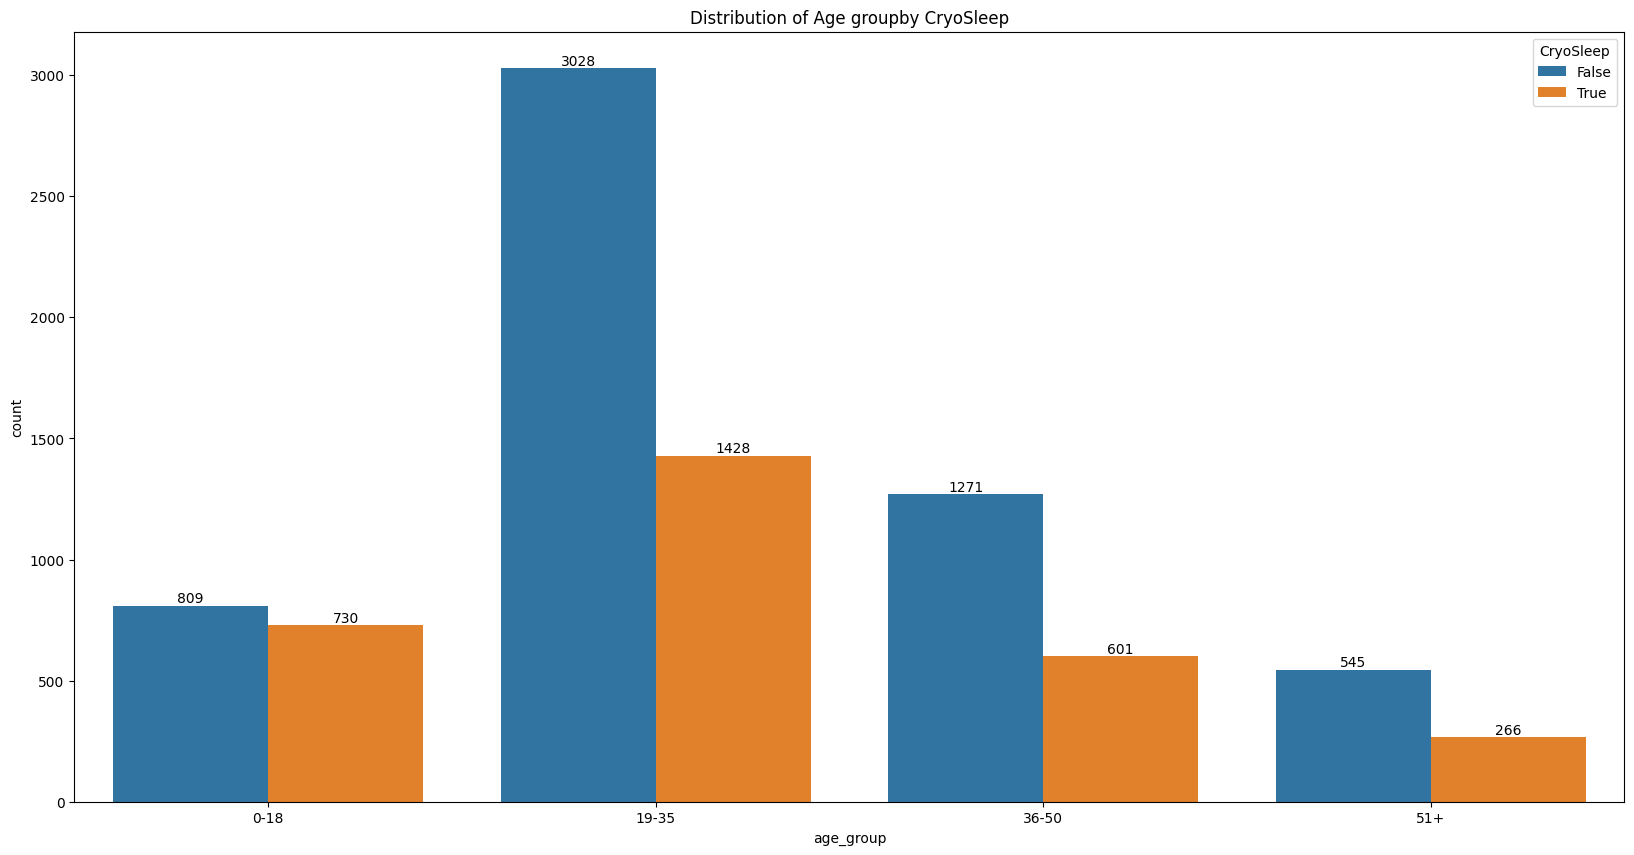

In [168]:
#Distribution of age groupby CryoSleep
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'age_group', hue = 'CryoSleep')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age groupby CryoSleep')
plt.show()

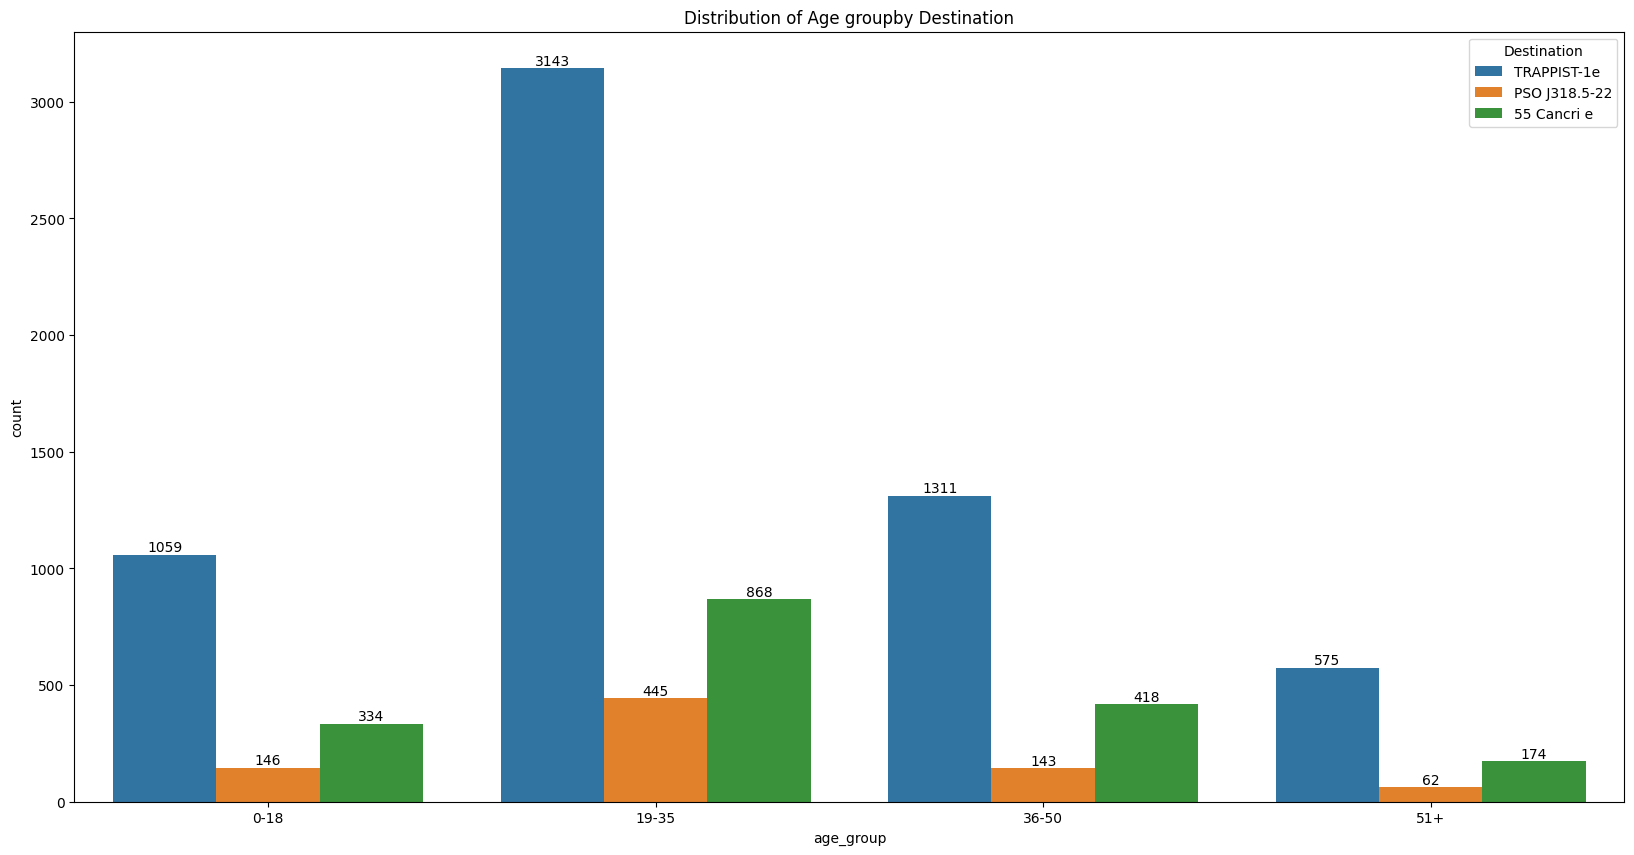

In [169]:
#Distribution of age groupby Destination
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'age_group', hue = 'Destination')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age groupby Destination')
plt.show()

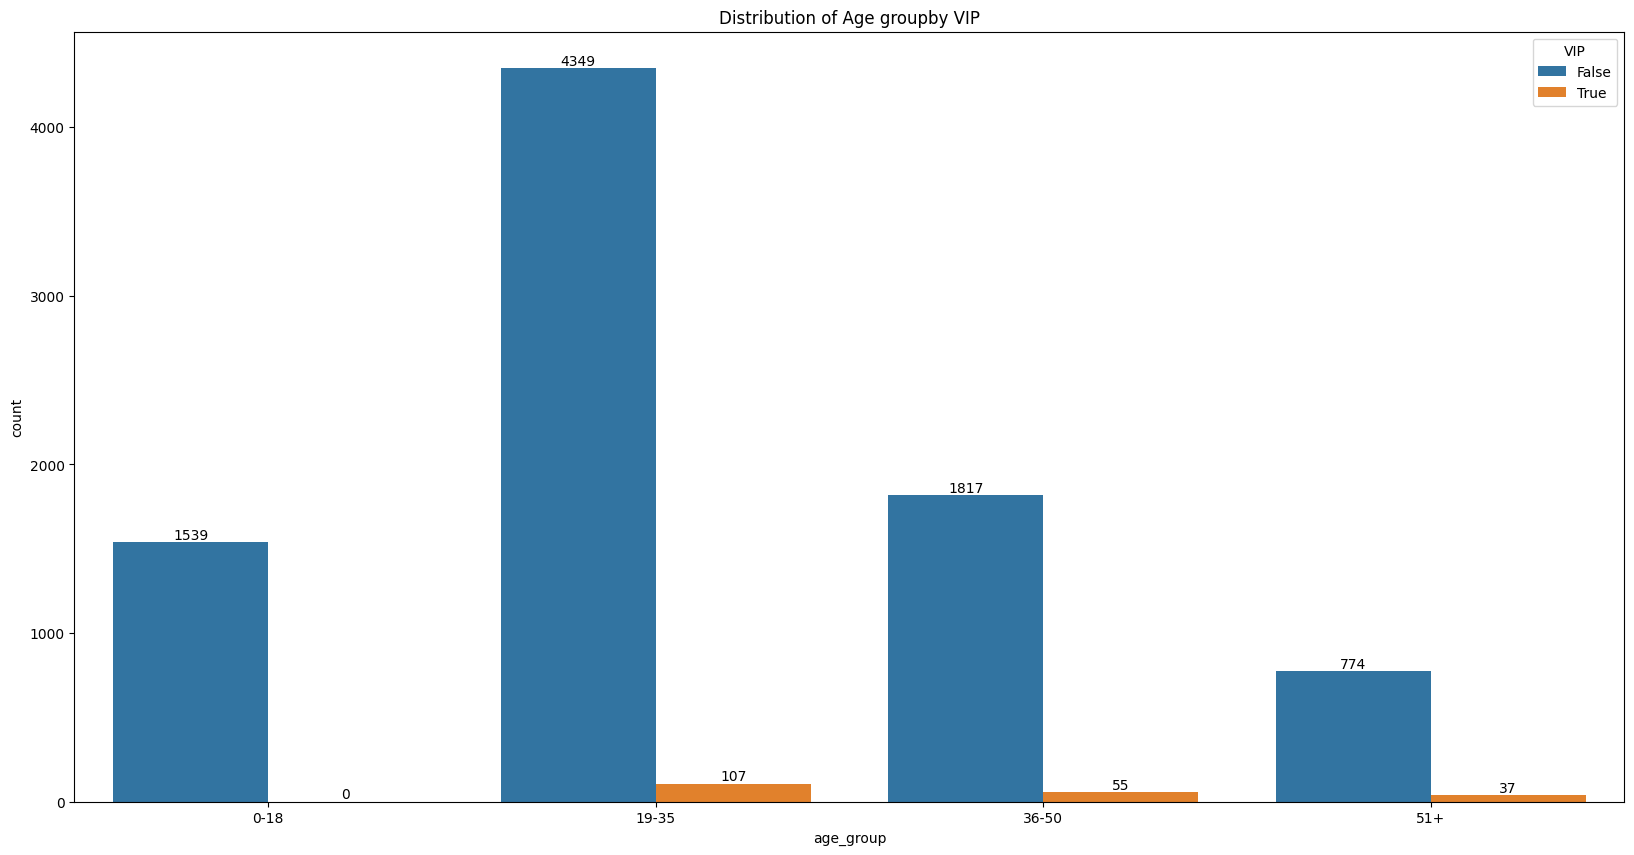

In [170]:
#Distribution of age groupby VIP
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'age_group', hue = 'VIP')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age groupby VIP')
plt.show()

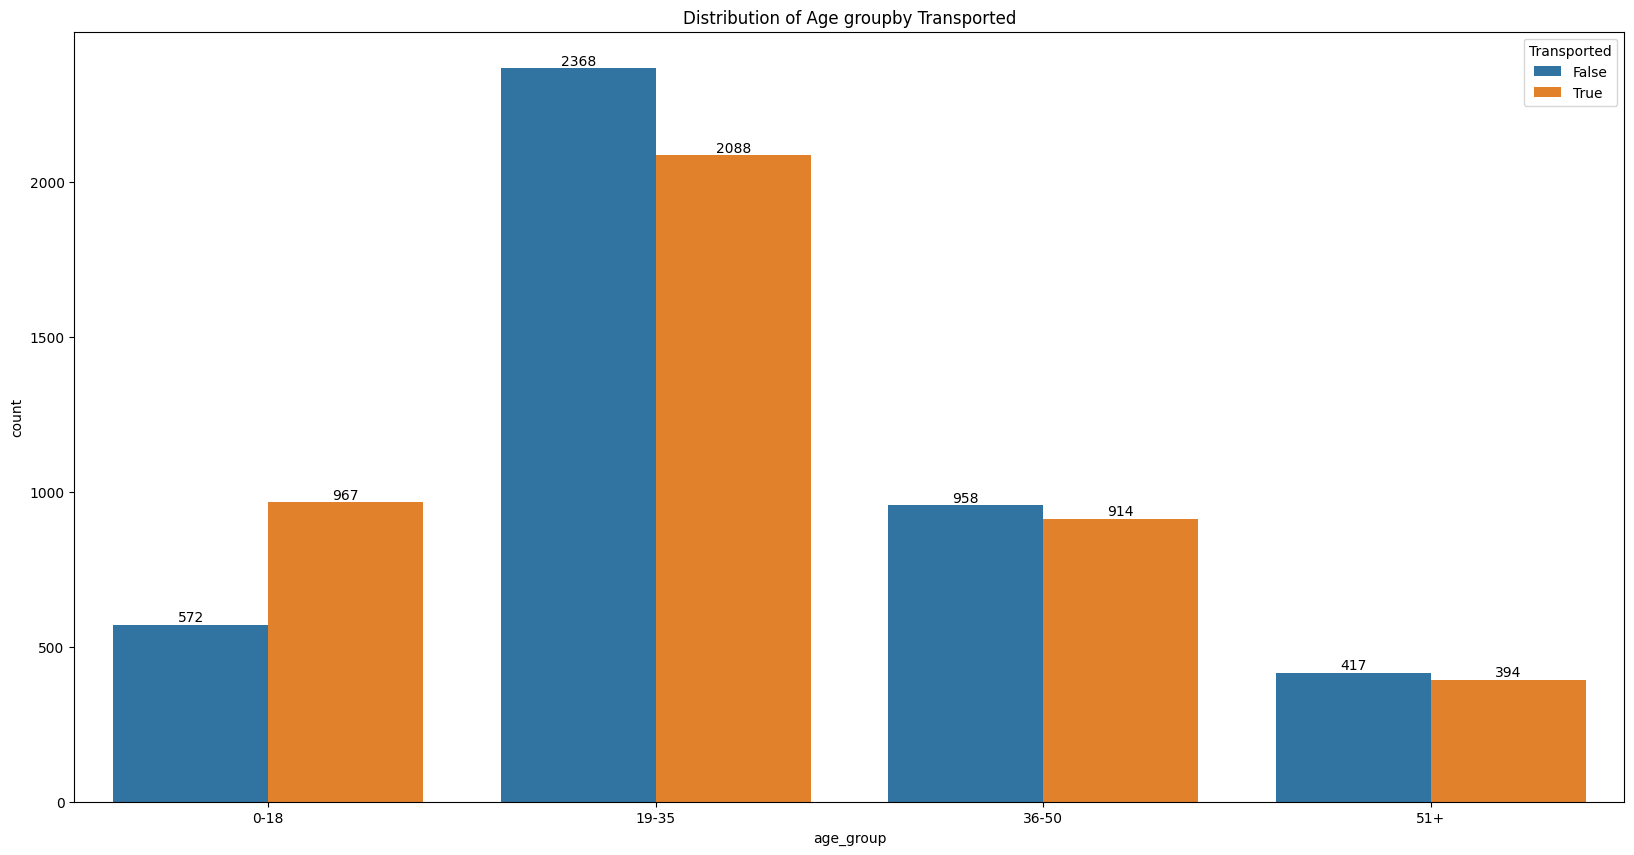

In [171]:
#Distribution of age groupby Transported
plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'age_group', hue = 'Transported')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age groupby Transported')
plt.show()

# label encoding

In [172]:
for column in df.select_dtypes(include=['object']).columns:
    #apply label encoding to object columns
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [173]:
df.dtypes

HomePlanet         int64
CryoSleep           bool
Cabin              int64
Destination        int64
Age              float64
VIP                 bool
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported         bool
age_group       category
dtype: object

In [174]:
# Dropping the 'PassengerId' and 'Name' columns
df = df.drop(['age_group'], axis=1)

# Correlation

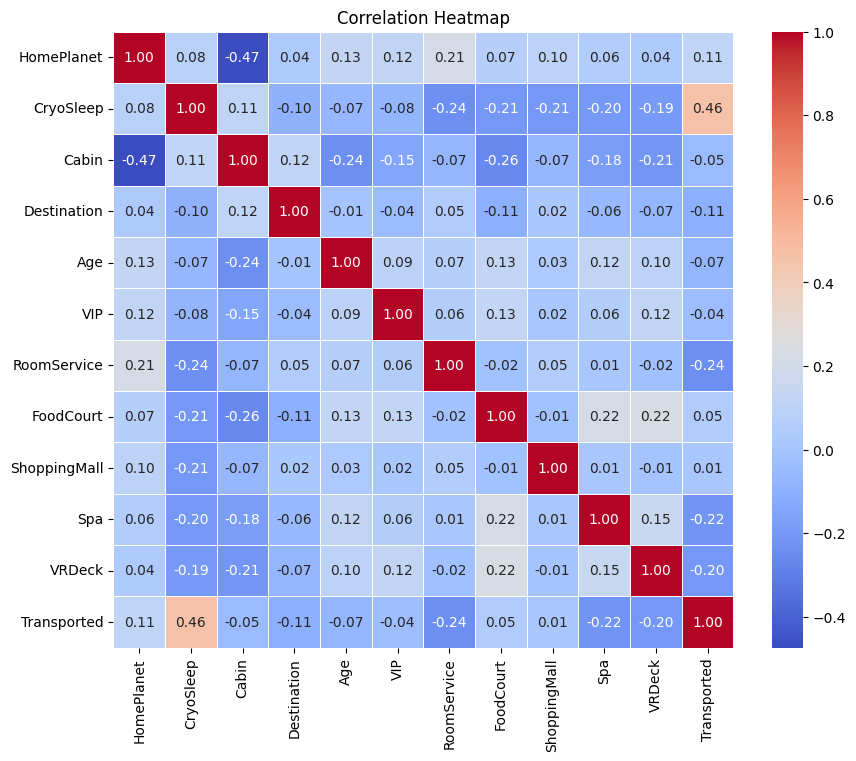

In [175]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Models

In [176]:
X = df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
y = df['Transported']

In [177]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0 )

# Logistic_Regression

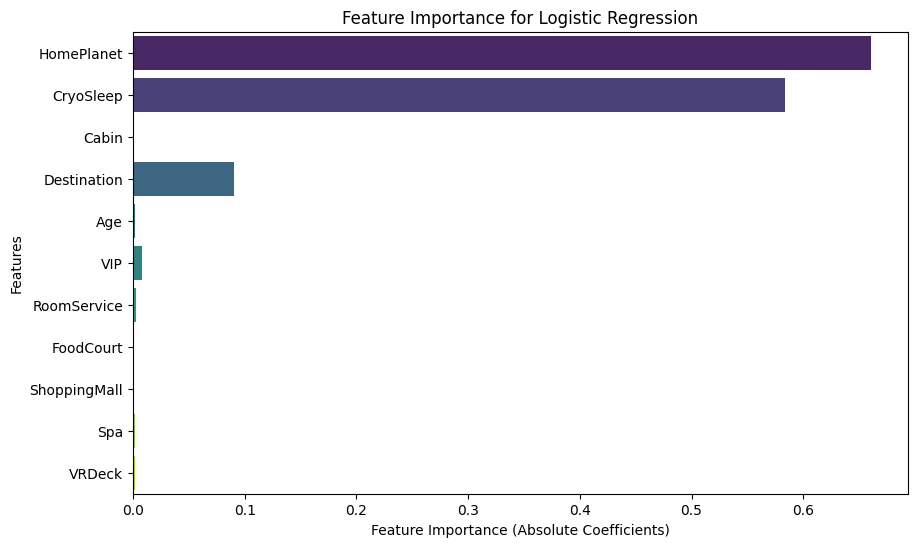

Training Accuracy: 0.7801786228752521
Testing Accuracy: 0.782258064516129

Confusion Matrix:
[[612 238]
 [140 746]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.72      0.76       850
        True       0.76      0.84      0.80       886

    accuracy                           0.78      1736
   macro avg       0.79      0.78      0.78      1736
weighted avg       0.79      0.78      0.78      1736



In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model on the training set
lr_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_lr = lr_model.predict(x_train)
# Make predictions on the testing set
y_test_pred_lr = lr_model.predict(x_test)

# Get feature importance (absolute values of coefficients)
feature_importance = abs(lr_model.coef_[0])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=x_train.columns, palette="viridis")
plt.title(f'Feature Importance for Logistic Regression')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Features')
plt.show()

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))

# Display confusion matrix and classification report for testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr))

# naive_bayes

In [179]:
from sklearn.naive_bayes import GaussianNB

# Initialize the GaussianNB classifier
NB_model = GaussianNB()

# Train the model on the training set
NB_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_NB = NB_model.predict(x_train)

# Make predictions on the testing set
y_test_pred_NB = NB_model.predict(x_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_NB))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_NB))

# Display confusion matrix and classification report for the testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_NB))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_NB))

Training Accuracy: 0.6995102276001153
Testing Accuracy: 0.7027649769585254

Confusion Matrix:
[[424 426]
 [ 90 796]]

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.50      0.62       850
        True       0.65      0.90      0.76       886

    accuracy                           0.70      1736
   macro avg       0.74      0.70      0.69      1736
weighted avg       0.74      0.70      0.69      1736



# DecisionTreeClassifier

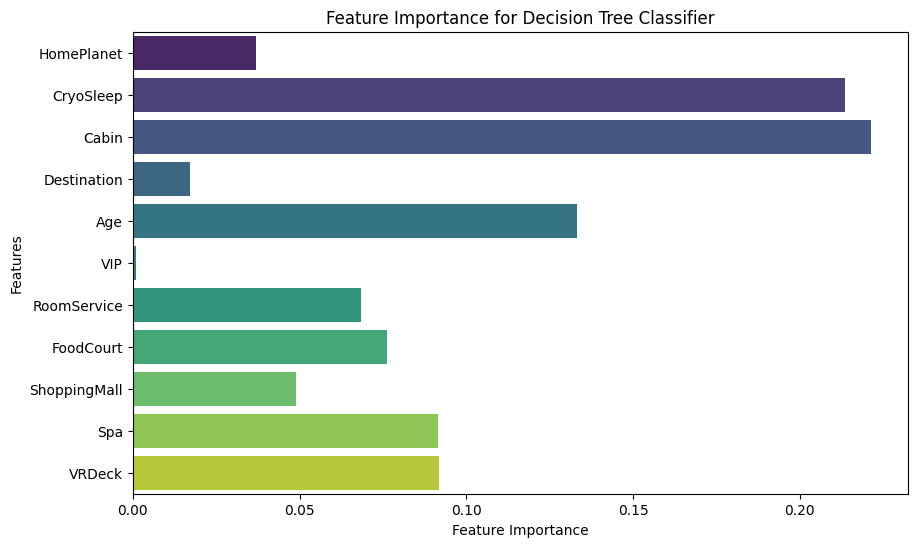

Training Accuracy: 0.9994237971766061
Testing Accuracy: 0.7402073732718893

Confusion Matrix:
[[629 221]
 [230 656]]

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.74      0.74       850
        True       0.75      0.74      0.74       886

    accuracy                           0.74      1736
   macro avg       0.74      0.74      0.74      1736
weighted avg       0.74      0.74      0.74      1736



In [180]:
from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_dt = dt_model.predict(x_train)

# Make predictions on the testing set
y_test_pred_dt = dt_model.predict(x_test)

# Get feature importance
feature_importance = dt_model.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=x_train.columns, palette="viridis")
plt.title(f'Feature Importance for Decision Tree Classifier')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))

# Display confusion matrix and classification report for the testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

# GradientBoostingClassifier

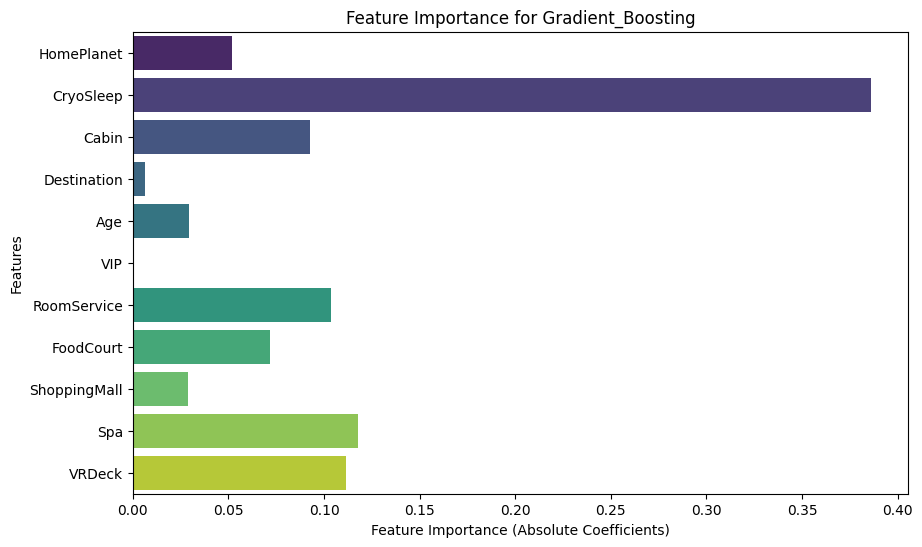

Training Accuracy: 0.8215211754537597
Testing Accuracy: 0.8024193548387096

Confusion Matrix:
[[662 188]
 [155 731]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.78      0.79       850
        True       0.80      0.83      0.81       886

    accuracy                           0.80      1736
   macro avg       0.80      0.80      0.80      1736
weighted avg       0.80      0.80      0.80      1736



In [181]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_gb = gb_model.predict(x_train)

# Make predictions on the testing set
y_test_pred_gb = gb_model.predict(x_test)

# Get feature importance
feature_importance = gb_model.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=x_train.columns, palette="viridis")
plt.title(f'Feature Importance for Gradient_Boosting')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Features')
plt.show()

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_gb))

# Display confusion matrix and classification report for the testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_gb))

# RandomForestClassifier

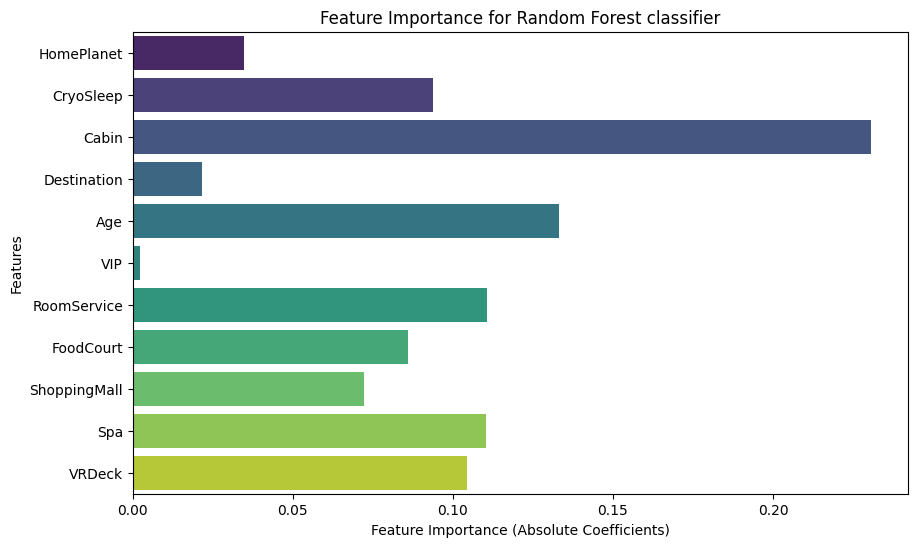

Training Accuracy: 0.9994237971766061
Testing Accuracy: 0.7949308755760369

Confusion Matrix:
[[696 154]
 [202 684]]

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.82      0.80       850
        True       0.82      0.77      0.79       886

    accuracy                           0.79      1736
   macro avg       0.80      0.80      0.79      1736
weighted avg       0.80      0.79      0.79      1736



In [182]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(x_train)

# Make predictions on the testing set
y_test_pred_rf = rf_model.predict(x_test)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=x_train.columns, palette="viridis")
plt.title(f'Feature Importance for Random Forest classifier')
plt.xlabel('Feature Importance (Absolute Coefficients)')
plt.ylabel('Features')
plt.show()

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Display confusion matrix and classification report for the testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

# KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)  

# Step 4: Train the model using the training data
knn_model.fit(x_train, y_train)

# Step 5: Make predictions on the testing data
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
print("Testing Accuracy:", accuracy_score(y_test, y_pred_knn))

# Display confusion matrix and classification report for the testing set
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Testing Accuracy: 0.7286866359447005

Confusion Matrix:
[[728 122]
 [349 537]]

Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.86      0.76       850
        True       0.81      0.61      0.70       886

    accuracy                           0.73      1736
   macro avg       0.75      0.73      0.73      1736
weighted avg       0.75      0.73      0.72      1736



# Model Comparison

In [184]:

#the score of the models
lr_acc = accuracy_score(y_test, y_test_pred_lr)
knn_acc = accuracy_score(y_test, y_pred_knn)
dtc_acc = accuracy_score(y_test, y_test_pred_dt)
rfc_acc = accuracy_score(y_test, y_test_pred_rf)
gbc_acc = accuracy_score(y_test, y_test_pred_gb)
nb_acc = accuracy_score(y_test, y_test_pred_NB)

models = pd.DataFrame({
    'Models': ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier','naive_bayes'],
    'Score': [100*round(lr_acc, 4), 100*round(knn_acc, 4), 100*round(dtc_acc, 4), 100*round(rfc_acc, 4), 100*round(gbc_acc, 4),100*round(nb_acc, 4)]
})

# Sort the DataFrame by score in descending order
models = models.sort_values(by='Score', ascending=False)

print(models)

                         Models  Score
4  Gradient Boosting Classifier  80.24
3      Random Forest Classifier  79.49
0           Logistic Regression  78.23
2      Decision Tree Classifier  74.02
1                           KNN  72.87
5                   naive_bayes  70.28


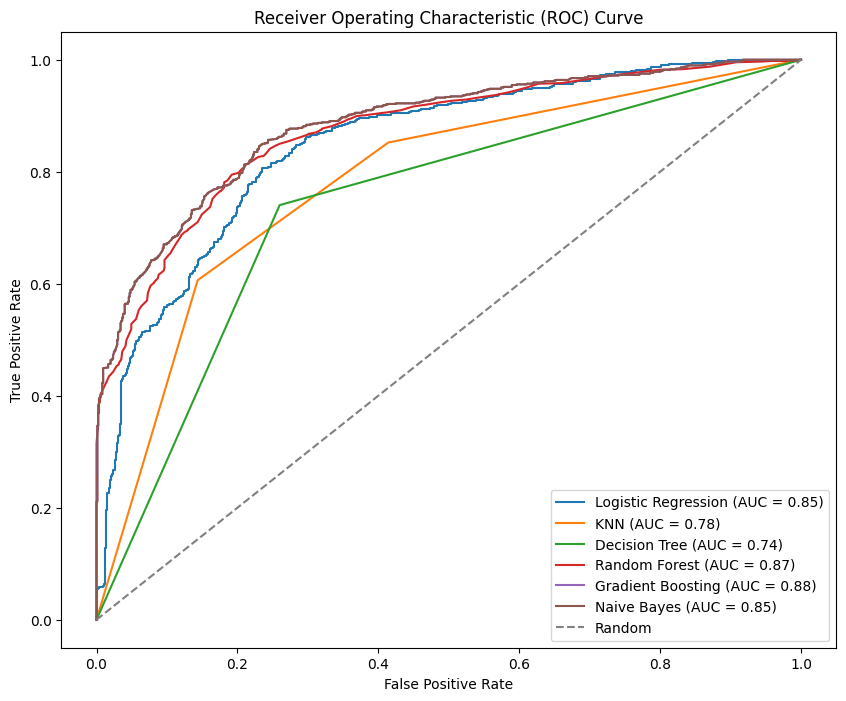

In [185]:
from sklearn.metrics import roc_curve, auc

#predicted probabilities for each model
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]
y_prob_knn = knn_model.predict_proba(x_test)[:, 1]
y_prob_dtc = dt_model.predict_proba(x_test)[:, 1]
y_prob_rfc = rf_model.predict_proba(x_test)[:, 1]
y_prob_gbc = gb_model.predict_proba(x_test)[:, 1]
y_prob_NB = NB_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_prob_gbc)
fpr_NB, tpr_NB, _ = roc_curve(y_test, y_prob_NB)

# Calculate AUC for each model
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
roc_auc_NB = auc(fpr_NB, tpr_NB)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, label=f'Gradient Boosting (AUC = {roc_auc_gbc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, label=f'Naive Bayes (AUC = {roc_auc_NB:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()